<a href="https://colab.research.google.com/github/NOORAHMED3676/My_projects/blob/main/Lognormal_Analytics_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('Sample B2C Dataset EDA.xlsx')
df.head()

,Week,Product ID,Category,Product Name,Price,Competitor Price,Pricing Currency,Sales Volume,Advertising Spend (EUR),Customer Reviews,Weather Index,Social Media Mentions,Warehouse Stock Level,Market Share Rank
0,2023-05-16 10:23:19.382,1,Electronics,Mobile Phone,487.45,509.42,EUR,65.0,3793.97,3.4,5,16,4079,1
1,2023-05-16 10:23:19.382,2,Electronics,Bluetooth Headphones,156.66,163.53,EUR,974.0,503.50,4.4,5,51,2072,3
2,2023-05-16 10:23:19.382,3,Electronics,Tablet,283.97,272.34,EUR,74.0,3282.74,4.1,5,62,2917,5
3,2023-05-16 10:23:19.382,4,Clothing,Luxury Jacket,435.91,456.21,EUR,686.0,4137.79,4.4,4,115,2208,1
4,2023-05-16 10:23:19.382,5,Clothing,Casual T-Shirt,30.66,31.68,EUR,193.0,1280.14,3.4,4,140,1122,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Week                     1040 non-null   datetime64[ns]
 1   Product ID               1040 non-null   int64         
 2   Category                 1040 non-null   object        
 3   Product Name             1040 non-null   object        
 4   Price                    1040 non-null   float64       
 5   Competitor Price         1040 non-null   float64       
 6   Pricing Currency         1040 non-null   object        
 7   Sales Volume             1023 non-null   float64       
 8   Advertising Spend (EUR)  1020 non-null   float64       
 9   Customer Reviews         1034 non-null   float64       
 10  Weather Index            1040 non-null   int64         
 11  Social Media Mentions    1040 non-null   int64         
 12  Warehouse Stock Level    1040 non-

In [5]:
df.describe()

,Week,Product ID,Price,Competitor Price,Sales Volume,Advertising Spend (EUR),Customer Reviews,Weather Index,Social Media Mentions,Warehouse Stock Level,Market Share Rank
count,1040,1040.000000,1040.000000,1040.000000,1023.000000,1020.000000,1034.000000,1040.000000,1040.000000,1040.000000,1040.000000
mean,2024-05-10 22:23:19.381999872,5.500000,2096.245673,2139.305558,494.318671,2696.952343,3.967795,4.517308,96.100962,2507.253846,3.500000
min,2023-05-16 10:23:19.382000,1.000000,-8704.800000,26.280000,10.000000,503.230000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,2023-11-12 16:23:19.382000128,3.000000,295.677500,298.775000,246.500000,1580.265000,3.600000,3.000000,28.000000,1789.000000,1.000000
50%,2024-05-10 22:23:19.382000128,5.500000,543.205000,629.960000,488.000000,2678.565000,4.000000,4.000000,66.500000,2506.500000,3.500000
75%,2024-11-07 04:23:19.382000128,8.000000,3948.200000,3994.500000,740.500000,3789.760000,4.300000,7.000000,137.000000,3173.000000,5.000000
max,2025-05-06 10:23:19.382000,10.000000,8769.600000,9143.600000,1115.000000,4993.780000,6.000000,10.000000,585.000000,5000.000000,7.000000
std,NaN,2.873663,2565.831815,2546.464378,287.362151,1294.663830,0.618055,2.293584,93.524437,1039.184298,2.110517


In [6]:
df.isnull().sum()

,0
Week,0
Product ID,0
Category,0
Product Name,0
Price,0
Competitor Price,0
Pricing Currency,0
Sales Volume,17
Advertising Spend (EUR),20
Customer Reviews,6


In [7]:
df['Category'].value_counts()

,count
Category,
Home Goods,416
Electronics,312
Clothing,312


###There is 3 categories

In [8]:
df[['Category','Product Name']].value_counts()

Category     Product Name        
Clothing     Casual T-Shirt          104
             Jeans                   104
             Luxury Jacket           104
Electronics  Bluetooth Headphones    104
             Mobile Phone            104
             Tablet                  104
Home Goods   Blender                 104
             Coffee Filters          104
             Coffee Maker            104
             Vacuum Cleaner          104
Name: count, dtype: int64

### There are 10 different products across 3 different categories. For each product we are having 104 rows each

In [9]:
df.duplicated().sum()

np.int64(0)

### No duplicates rows found in the Data

In [19]:
df['Price']=np.where((df['Price']==0)&(df['Competitor Price']>0),df['Competitor Price'],df['Price'])

### Since our analysis showed that product prices and competitor prices are closely aligned, missing prices were imputed using competitor prices to maintain realistic market positioning.

In [11]:
df['Sales Volume'].fillna(df['Sales Volume'].median(), inplace=True)
df['Advertising Spend (EUR)'].fillna(df['Advertising Spend (EUR)'].median(), inplace=True)
df['Customer Reviews'].fillna(0, inplace=True)

### "Missing values were addressed using targeted imputation: median values were applied to numerical fields like Sales Volume and Advertising Spend to preserve central trends, while missing Customer Reviews were filled with 0 to reflect a lack of customer feedback. This ensured clean, unbiased data for analysis."

In [13]:
median_price = df[df['Category'] == 'Home Goods']['Price'].median()
df.loc[df['Price'] < 0, 'Price'] = median_price
df.loc[df['Price'] == 0, 'Price'] = median_price

### "To correct invalid pricing, negative and zero Price values in the 'Home Goods' category were replaced with the category's median price. This ensured realistic pricing for accurate trend and competitor analysis."

In [15]:
exchange_rate = 0.10
df['Price_EUR'] = df.apply(lambda row: row['Price'] * exchange_rate if row['Pricing Currency'] == 'TRY' else row['Price'], axis=1)
df['Competitor Price_EUR'] = df.apply(lambda row: row['Competitor Price'] * exchange_rate if row['Pricing Currency'] == 'TRY' else row['Competitor Price'], axis=1)

### "To ensure pricing consistency, all prices listed in TRY were converted to EUR using an exchange rate of 0.10. This allowed for accurate cross-comparison of Price and Competitor Price across currencies."

In [21]:
df['Price_Diff'] = df['Price_EUR'] - df['Competitor Price_EUR']

### "The Price_Diff feature was created to capture the pricing gap between our product and the competitor, allowing us to measure how underpricing or overpricing impacts sales volume across categories."

### **Segment Influence Analysis**

1.Sales Volume by Category:

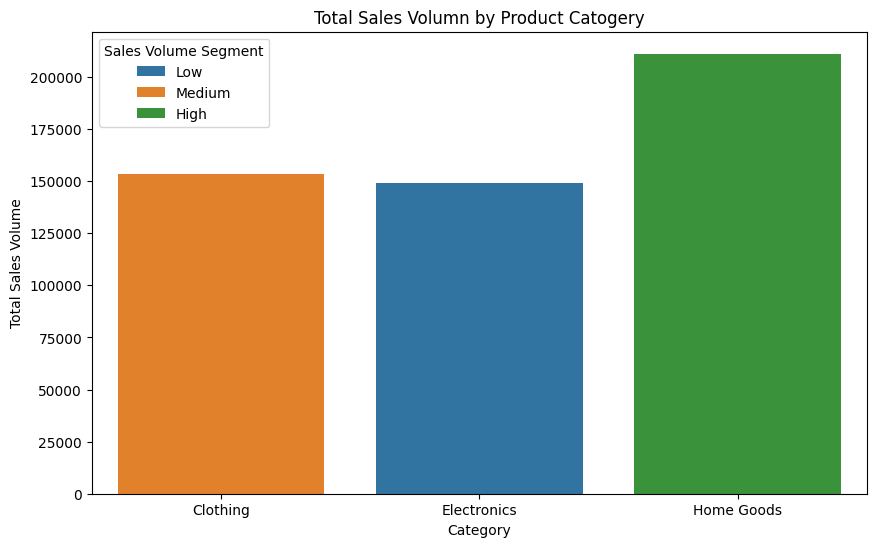

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales Volume', hue='Sales Volume Segment', data=segment_sales_volume_by_category)
plt.title('Total Sales Volumn by Product Catogery')
plt.xlabel('Category')
plt.ylabel('Total Sales Volume')
plt.show()

### Home Goods has the highest sales overall, while Clothing and Electronics have similar but lower sales volumes

###  **Sales Volume by Customer Review Segment across Categories**

In [33]:
bins=[0,3,4,6]
labels=['Low','Medium','High']
df['Customer Review Segment']=pd.cut(df['Customer Reviews'],bins=bins,labels=labels)

### Customer Reviews were segmented into Low (<3), Medium (3-4), and High (>4) to capture product satisfaction levels on a 1–6 scale. This enabled assessment of how varying satisfaction levels drive sales volume across categories.


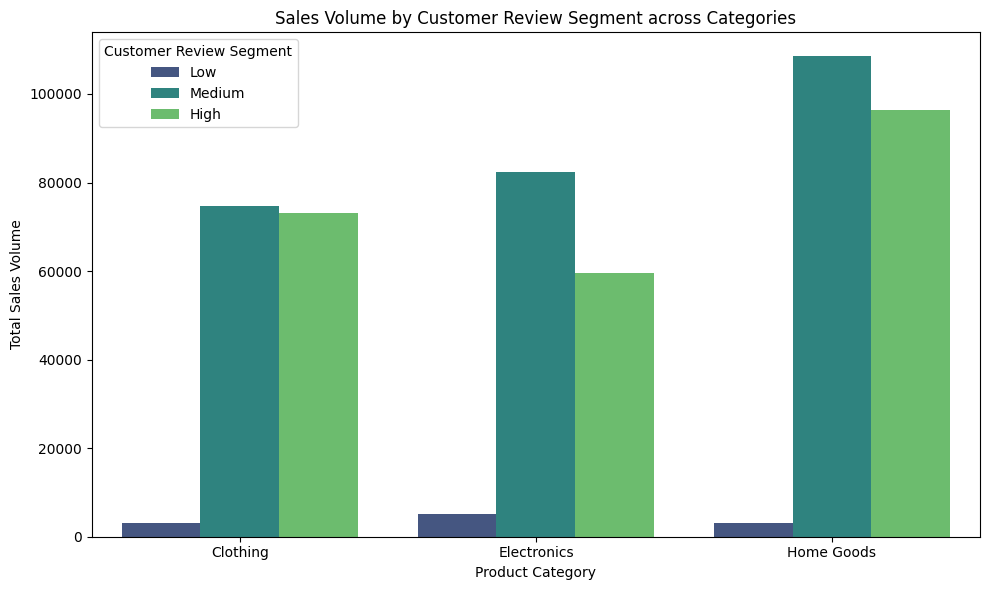

In [35]:
# Group by Category + Review Segment
segment_sales = df.groupby(['Category', 'Customer Review Segment'])['Sales Volume'].sum().reset_index()

# Plot grouped bar chart
plt.figure(figsize=(10,6))
sns.barplot(
    data=segment_sales,
    x='Category',
    y='Sales Volume',
    hue='Customer Review Segment',
    palette='viridis' # Changed color palette
)


plt.title('Sales Volume by Customer Review Segment across Categories')
plt.ylabel('Total Sales Volume')
plt.xlabel('Product Category')
plt.legend(title='Customer Review Segment')
plt.tight_layout()
plt.show()

### Insights:

   1. Most sales come from medium-rated products (3-4).

   2. High-rated products (>4) sell best in Clothing and Home Goods, which    shows people care about quality.

   3.  Low-rated products (<3) have negligible sales impact, reflecting reduced
   demand.



### Price vs Sales Volume

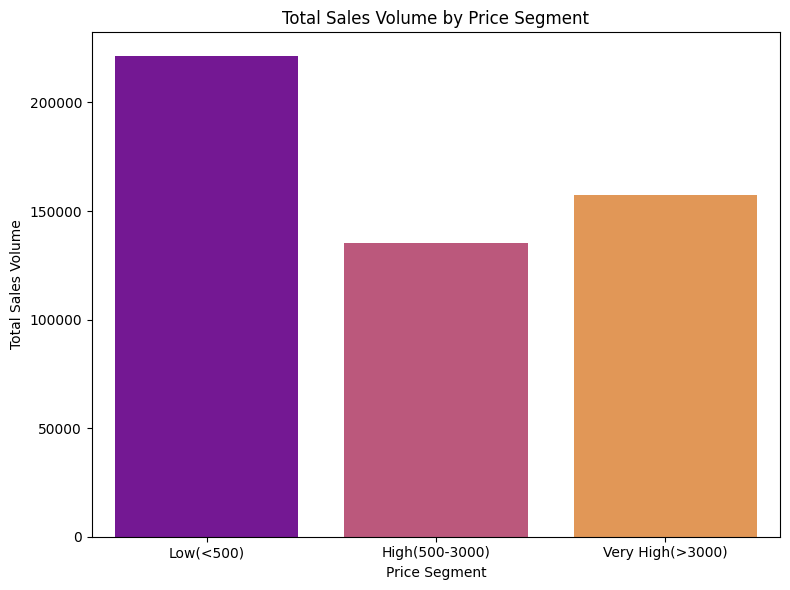

In [37]:
bins=[0,500,3000,8800]
label=['Low(<500)','High(500-3000)','Very High(>3000)']
df['Price Segment']=pd.cut(df['Price'],bins=bins,labels=label)

# Group by Category + Price Segment
price_sales=df.groupby('Price Segment')['Sales Volume'].sum().reset_index()

# Plot grouped bar chart
plt.figure(figsize=(8,6))
sns.barplot(data=price_sales, x='Price Segment', y='Sales Volume', palette='plasma') # Changed color palette
plt.title('Total Sales Volume by Price Segment')
plt.ylabel('Total Sales Volume')
plt.xlabel('Price Segment')
plt.tight_layout()
plt.show()

### Most sales come from low-priced products (<500). Sales then drop for higher price segments, with medium (500-3000) and very high (>3000) priced items selling less.

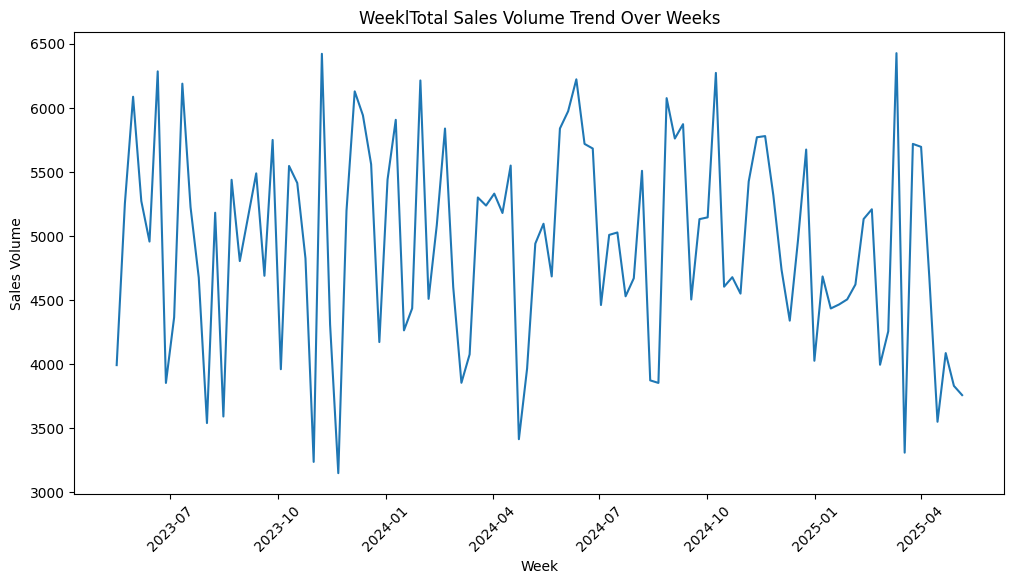

In [40]:
weekly_sales = df.groupby('Week')['Sales Volume'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Week', y='Sales Volume', data=weekly_sales)
plt.title('WeeklTotal Sales Volume Trend Over Weeks')
plt.xticks(rotation=45)
plt.show()

### Sales volume trends remain relatively stable over time, fluctuating between 3500-6500 units per week. Frequent short-term spikes suggest possible promotional campaigns or seasonal buying patterns. No consistent growth or decline is observed.


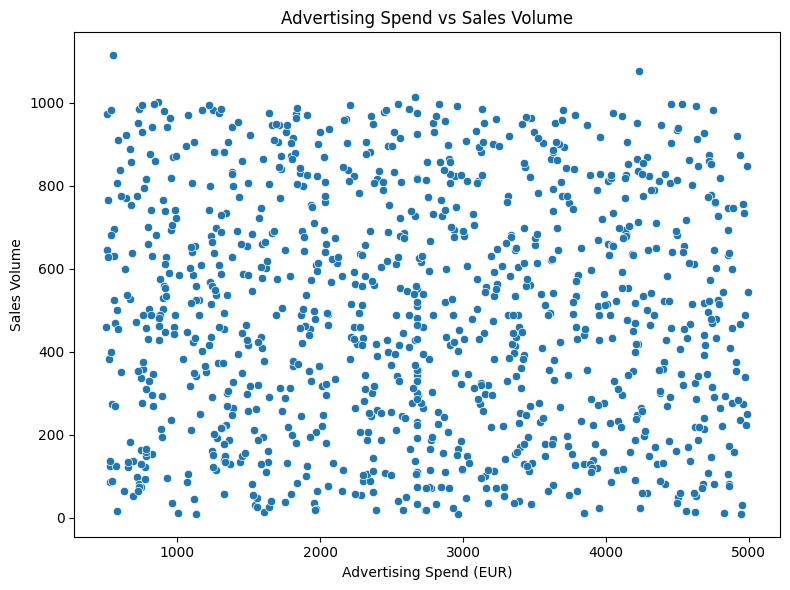

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Advertising Spend (EUR)', y='Sales Volume', ) # Removed specific color
plt.title('Advertising Spend vs Sales Volume')
plt.xlabel('Advertising Spend (EUR)')
plt.ylabel('Sales Volume')
plt.tight_layout()
plt.show()

### No strong relationship was observed between weekly advertising spend and sales volume.

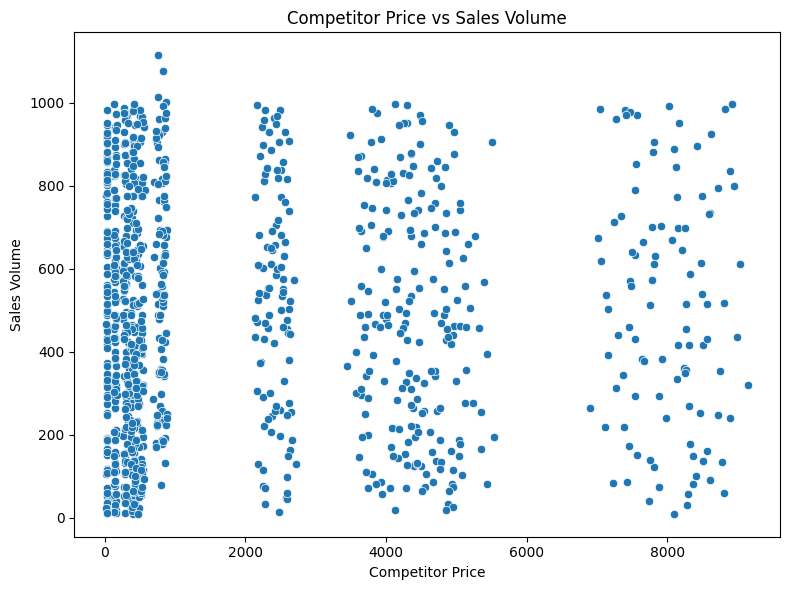

In [45]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Competitor Price', y='Sales Volume', ) # Removed specific color
plt.title('Competitor Price vs Sales Volume')
plt.xlabel('Competitor Price')
plt.ylabel('Sales Volume')
plt.tight_layout()
plt.show()

### No clear relationship was observed between competitor pricing levels and our sales volume, indicating demand in this period was largely independent of competitor price positioning.

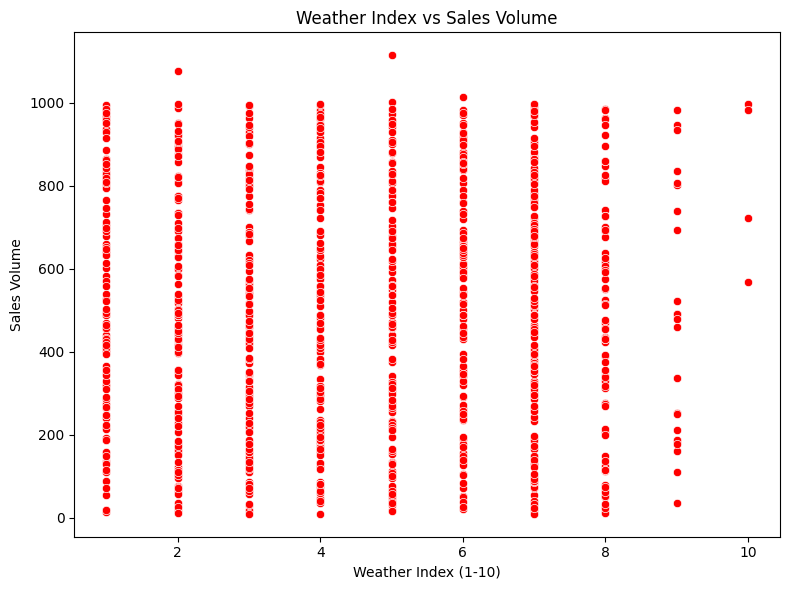

In [46]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Weather Index', y='Sales Volume', color='red')
plt.title('Weather Index vs Sales Volume')
plt.xlabel('Weather Index (1-10)')
plt.ylabel('Sales Volume')
plt.tight_layout()
plt.show()

### Sales volume stays stable up to a weather index of 7, but drops and becomes less frequent at higher indexes, suggesting less shopping in bad weather.

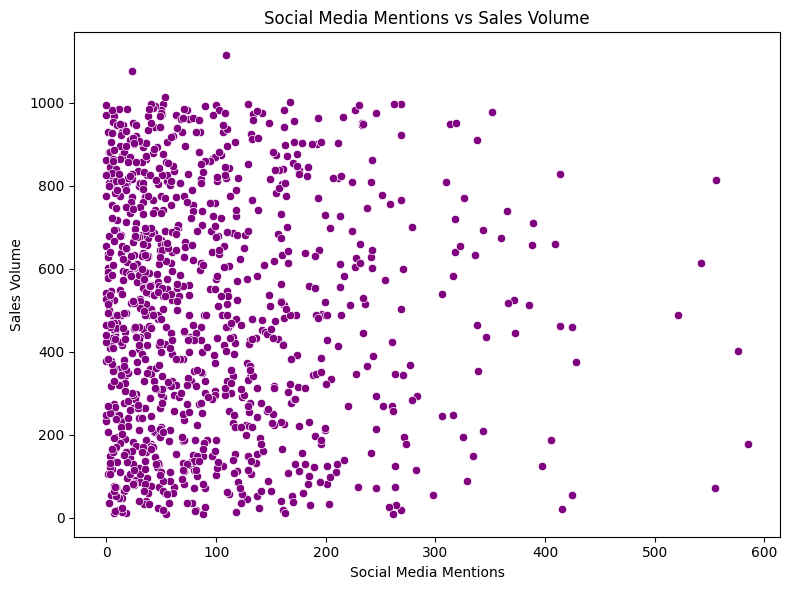

In [49]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Social Media Mentions', y='Sales Volume', color='purple' )
plt.title('Social Media Mentions vs Sales Volume')
plt.xlabel('Social Media Mentions')
plt.ylabel('Sales Volume')
plt.tight_layout()
plt.show()

### Sales volume shows no strong relationship with social media mentions, suggesting that increased online activity did not directly drive demand in this period.

### Insights:




*   **Customer Review Segments** (<3, 3-4, >4) showed that medium-rated products (3-4) drive the majority of sales across categories, with high-rated products (>4) also contributing substantially.



*  **Product Category vs Sales:** Home Goods recorded the highest overall sales volume, followed by Clothing and Electronics, highlighting stronger demand in household products.

*   **Price Segments**: Most sales came from lower-priced products (<500), with sales declining across medium (500-3000) and high (>3000) price ranges, reflecting higher purchase volume in more affordable segments.



*   Trend Detection **Sales volume trends** remained broadly stable over time, fluctuating weekly between ~3500-6500 units, with no consistent long-term growth or decline.
    
    **Advertising spend**, **weather index, and social media mentions** showed limited direct correlation with sales volume, suggesting sales were primarily driven by inherent product demand and customer satisfaction.

*    **Competitor Impact Assessment**
No strong relationship observed between competitor pricing and sales volume, indicating that demand was largely unaffected by competitor price positioning in this period.

*   **Competitor Impact Assessment** No strong relationship observed between competitor pricing and sales volume, indicating that demand was largely unaffected by competitor price positioning in this period.


*   “Overall, **customer satisfaction levels** emerged as the most influential driver of sales, while external factors such as advertising spend, weather conditions, social media activity, and competitor pricing showed limited direct impact on weekly sales volumes.”




 ### Recommendations:**



*   Since **medium and high-rated products** drive nearly all sales, keep investing in quality and customer experience to avoid slipping into low ratings that hardly sell.
*   **High-rated** products are especially important in **Clothing and Home Goods**, so make sure quality checks, design improvements, and customer service are top-notch there.

*   Your data showed no clear link between higher ad spend and sales, so re-evaluate campaigns to ensure budgets are effectively driving demand.



*   **Monitor category mix and pricing strategy**. Home Goods and low-priced segments are key sales drivers, so align inventory, promotions, and pricing to sustain volume.